In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(rescale=1/255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

validation_gen = ImageDataGenerator(rescale=1/255)

In [4]:
train_generator = train_gen.flow_from_directory('C:/Users/HP PAVILION 15/Documents/Programming/Datasets/rock-paper-scissors/rps',
                                                        target_size=(150,150),
                                                        class_mode='categorical')
validation_generator = validation_gen.flow_from_directory(directory="C:/Users/HP PAVILION 15/Documents/Programming/Datasets/rock-paper-scissors/rps-test-set",
                                                              target_size=(150,150),
                                                              
                                                              class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [5]:
model = keras.models.Sequential([keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
                                keras.layers.MaxPooling2D(2,2),
                                keras.layers.Conv2D(64,(3,3),activation='relu'),
                                keras.layers.MaxPooling2D(2,2),
                                keras.layers.Conv2D(128,(3,3),activation='relu'),
                                keras.layers.MaxPooling2D(2,2),
                                keras.layers.Conv2D(128,(3,3),activation='relu'),
                                keras.layers.MaxPooling2D(2,2),
                                keras.layers.Flatten(),
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(512,activation='relu'),
                                keras.layers.Dense(3,activation='softmax')])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [8]:
model_data = model.fit_generator(train_generator,
                                verbose=1,
                                epochs=25,
                                validation_data=validation_generator)

Epoch 1/25
79/79 [==============================] - 109s 1s/step - loss: 1.1454 - accuracy: 0.4091 - val_loss: 0.9749 - val_accuracy: 0.7527
Epoch 2/25
79/79 [==============================] - 112s 1s/step - loss: 0.8533 - accuracy: 0.6079 - val_loss: 0.4620 - val_accuracy: 0.9489
Epoch 3/25
79/79 [==============================] - 109s 1s/step - loss: 0.6016 - accuracy: 0.7476 - val_loss: 0.1836 - val_accuracy: 0.9892
Epoch 4/25
79/79 [==============================] - 111s 1s/step - loss: 0.3827 - accuracy: 0.8409 - val_loss: 0.0399 - val_accuracy: 1.0000
Epoch 5/25
79/79 [==============================] - 109s 1s/step - loss: 0.2876 - accuracy: 0.8901 - val_loss: 0.0523 - val_accuracy: 1.0000
Epoch 6/25
79/79 [==============================] - 110s 1s/step - loss: 0.2492 - accuracy: 0.9083 - val_loss: 0.1946 - val_accuracy: 0.8925
Epoch 7/25
79/79 [==============================] - 109s 1s/step - loss: 0.1830 - accuracy: 0.9306 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 8/25
79

In [10]:
print(model_data.history)

{'loss': [1.1455596715684921, 0.8532847376096816, 0.601200548997001, 0.3833677604084923, 0.28739115113303776, 0.24951394943017807, 0.18353546280118208, 0.15596682919514557, 0.1404581057765181, 0.13560716208839227, 0.12846140725508567, 0.11653159264889028, 0.11778522186158669, 0.10917476046283449, 0.08828793196007609, 0.11807027366160164, 0.09191072704801742, 0.10079883725570869, 0.07499359056338786, 0.07598008254731428, 0.07852263987888508, 0.07468151689861857, 0.08420324595718985, 0.06478775412690574, 0.08477480574085983], 'accuracy': [0.409127, 0.6079365, 0.74761903, 0.840873, 0.8900794, 0.90833336, 0.9305556, 0.95039684, 0.9507936, 0.95555556, 0.9626984, 0.9623016, 0.96507937, 0.9710317, 0.97380954, 0.9678571, 0.9753968, 0.9702381, 0.9746032, 0.9765873, 0.97301584, 0.97738093, 0.9742063, 0.9781746, 0.9765873], 'val_loss': [0.9749145110448202, 0.4620428780714671, 0.18356158708532652, 0.039855147091050945, 0.052292133371035256, 0.19460481156905493, 0.008371481172313603, 0.040319822573

In [12]:
model_data.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
acc = model_data.history['accuracy']
loss = model_data.history['loss']
validation_acc = model_data.history['val_accuracy']
validation_loss = model_data.history['val_loss']

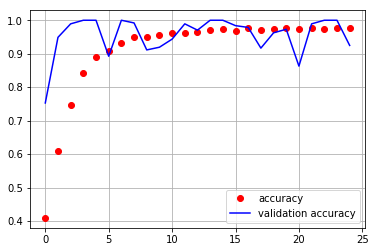

In [18]:
epochs = range(len(acc))

plt.plot(epochs,acc,'ro',label='accuracy')
plt.plot(epochs,validation_acc,'b',label='validation accuracy')
plt.grid()
plt.legend()
#plt.figure()
plt.show()

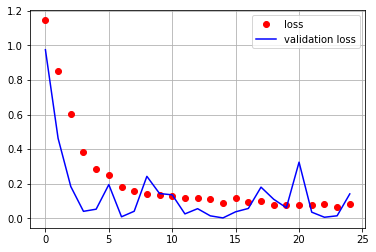

In [19]:
plt.plot(epochs,loss,'ro',label='loss')
plt.plot(epochs,validation_loss,'b',label='validation loss')
plt.grid()
plt.legend()
#plt.figure()
plt.show()

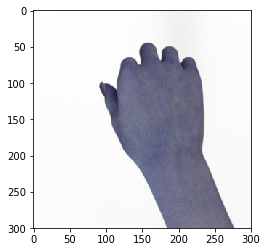

In [25]:
image = cv2.imread('C:/Users/HP PAVILION 15/Documents/Programming/Datasets/rock-paper-scissors/rps-validation/rock6.png')
plt.imshow(image)

In [26]:
import numpy as np
image=cv2.resize(image,(150,150))
image=np.reshape(image,(1,150,150,3))

In [27]:
classes = model.predict(image, batch_size=10)

print(classes)



[[0. 1. 0.]]


In [ ]:
if classes[0]>0.5:
    print("it's a dog")
else:
    print("it's a cat")